# RNN (Recurrent Neural Network)



Vanilla RNNs: </br>
  *  Structure: A basic RNN consists of an input layer, a recurrent hidden layer, and an output layer. The key feature of an RNN is that it passes information from the previous time step’s hidden state to the current time step.
  *  Limitation: Standard RNNs struggle to learn long-term dependencies due to the vanishing gradient problem during backpropagation through time (BPTT). This means that when the gap between relevant information is long, the model often forgets important earlier information.


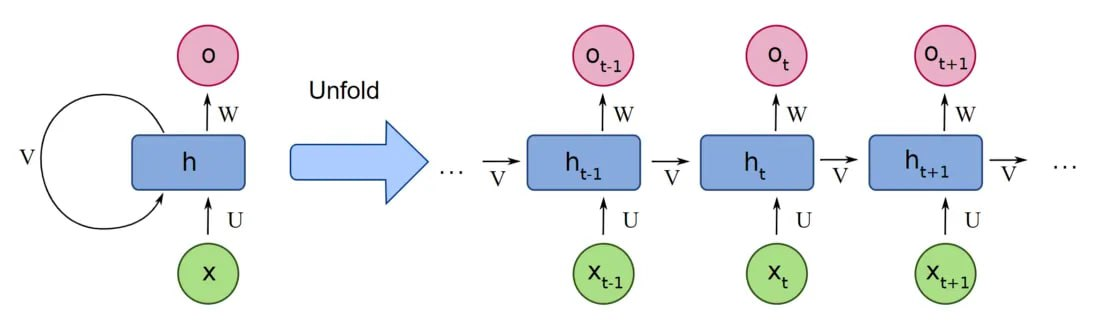


# LSTM (Long-Short Term Memory)

Long Short-Term Memory (LSTM) is a type of Recurrent Neural Network (RNN) that addresses some of the key limitations of vanilla RNNs, particularly the problem of vanishing gradients during training. LSTMs are specifically designed to handle long-range dependencies in sequential data more effectively, making them a powerful tool for tasks such as language modeling, machine translation, speech recognition, and time-series forecasting.

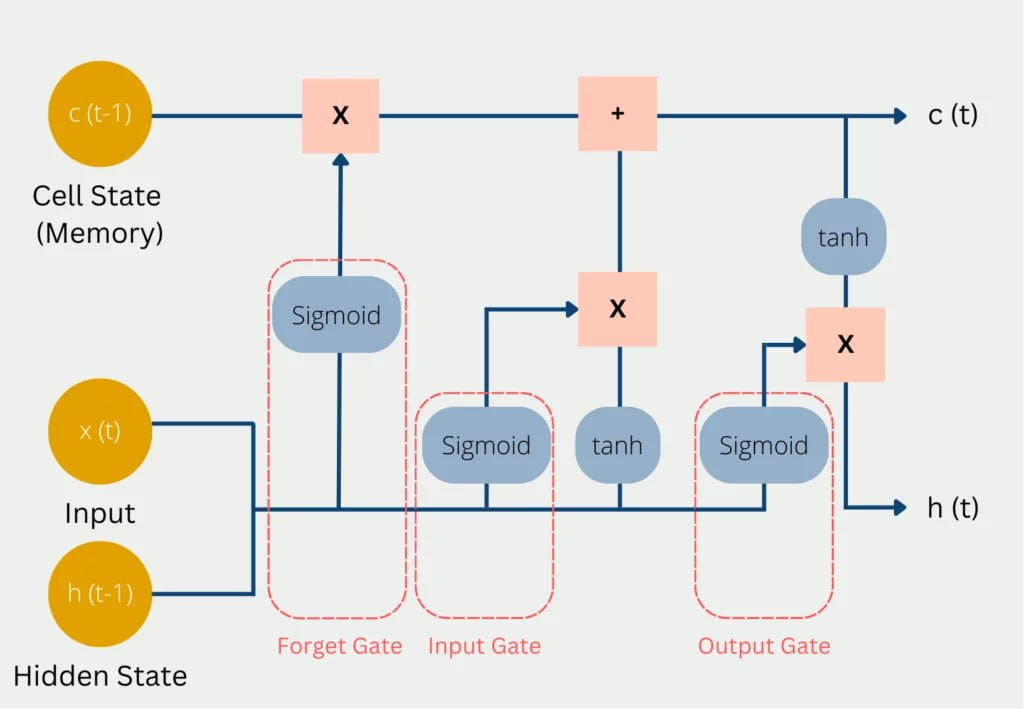


Applications of LSTMs: </br>

LSTMs are widely used for tasks where long-term dependencies in sequential data are important:
  *  Natural Language Processing (NLP): Language modeling, machine translation, text generation, sentiment analysis.
  *  Speech Recognition: Transcribing spoken language into text.
  *  Time-Series Forecasting: Predicting future values based on historical data, such as in stock price prediction or weather forecasting.
  *  Video Analysis: Recognizing actions or predicting future frames in a video sequence.  </br> </br>

For this matter, we chose "Air Quality UCI" dataset available at https://archive.ics.uci.edu/dataset/360/air+quality. The dataset contains 9358 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. </br>
The dataset consists of the following features:


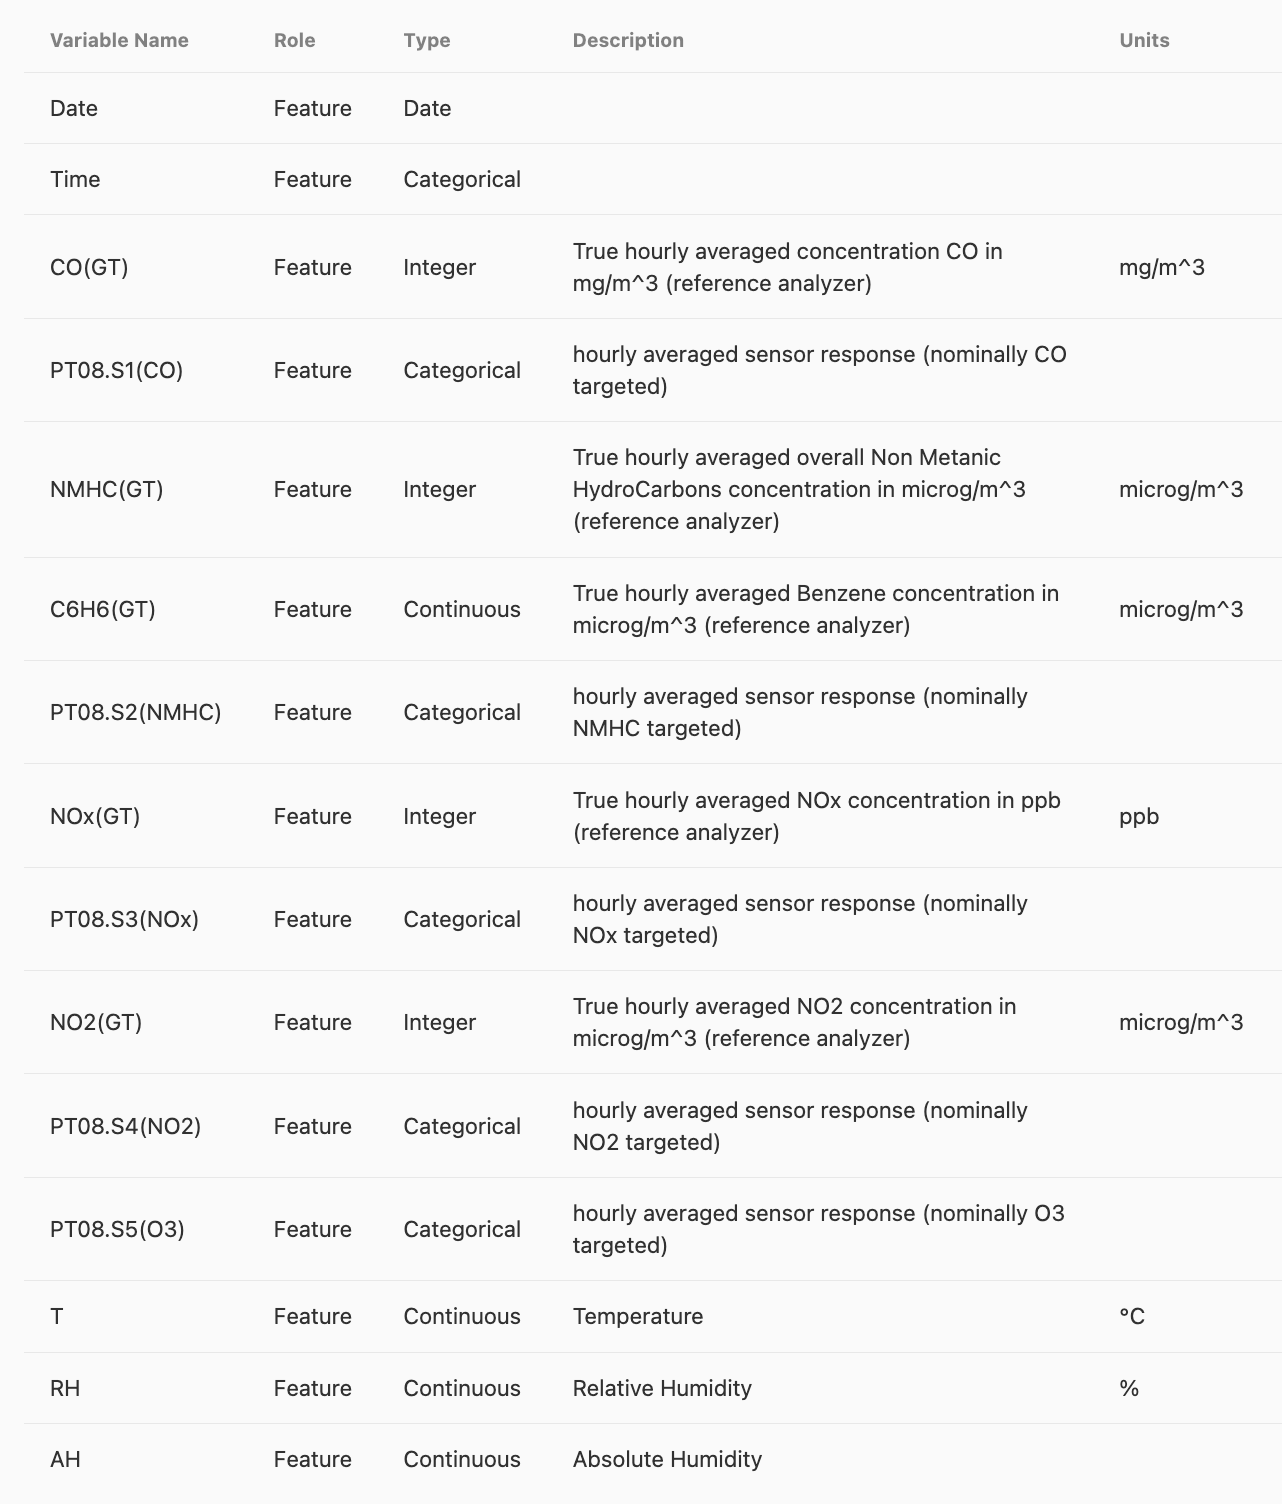

In [171]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [172]:
drive.mount("/content/drive")
df = pd.read_excel('/content/drive/MyDrive/Datasets/AirQualityUCI.xlsx', parse_dates={'Datetime': ['Date', 'Time']})

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-172-d463bb240fc7>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_excel('/content/drive/MyDrive/Datasets/AirQualityUCI.xlsx', parse_dates={'Datetime': ['Date', 'Time']})


In [173]:
df.describe()

Datetime       CO(GT)  PT08.S1(CO)     NMHC(GT)  \
count                 9357  9357.000000  9357.000000  9357.000000   
mean   2004-09-21 16:00:00   -34.207524  1048.869652  -159.090093   
min    2004-03-10 18:00:00  -200.000000  -200.000000  -200.000000   
25%    2004-06-16 05:00:00     0.600000   921.000000  -200.000000   
50%    2004-09-21 16:00:00     1.500000  1052.500000  -200.000000   
75%    2004-12-28 03:00:00     2.600000  1221.250000  -200.000000   
max    2005-04-04 14:00:00    11.900000  2039.750000  1189.000000   
std                    NaN    77.657170   329.817015   139.789093   

          C6H6(GT)  PT08.S2(NMHC)      NOx(GT)  PT08.S3(NOx)      NO2(GT)  \
count  9357.000000    9357.000000  9357.000000   9357.000000  9357.000000   
mean      1.865576     894.475963   168.604200    794.872333    58.135898   
min    -200.000000    -200.000000  -200.000000   -200.000000  -200.000000   
25%       4.004958     711.000000    50.000000    637.000000    53.000000   
50%       7.886653     894.500000   141.000000    794.250000    96.000000   
75%      13.636091    1104.750000   284.200000    960.250000   133.000000   
max      63.741476    2214.000000  1479.000000   2682.750000   339.700000   
std      41.380154     342.315902   257.424561    321.977031   126.931428   

       PT08.S4(NO2)  PT08.S5(O3)            T           RH           AH  
count   9357.000000  9357.000000  9357.000000  9357.000000  9357.000000  
mean    1391.363266   974.951534     9.776600    39.483611    -6.837604  
min     -200.000000  -200.000000  -200.000000  -200.000000  -200.000000  
25%     1184.750000   699.750000    10.950000    34.050000     0.692275  
50%     1445.500000   942.000000    17.200000    48.550000     0.976823  
75%     1662.000000  1255.250000    24.075000    61.875000     1.296223  
max     2775.000000  2522.750000    44.600000    88.725000     2.231036  
std      467.192382   456.922728    43.203438    51.215645    38.976670

In [174]:
df.head()

Datetime  CO(GT)  PT08.S1(CO)  NMHC(GT)   C6H6(GT)  \
0 2004-03-10 18:00:00     2.6      1360.00       150  11.881723   
1 2004-03-10 19:00:00     2.0      1292.25       112   9.397165   
2 2004-03-10 20:00:00     2.2      1402.00        88   8.997817   
3 2004-03-10 21:00:00     2.2      1375.50        80   9.228796   
4 2004-03-10 22:00:00     1.6      1272.25        51   6.518224   

   PT08.S2(NMHC)  NOx(GT)  PT08.S3(NOx)  NO2(GT)  PT08.S4(NO2)  PT08.S5(O3)  \
0        1045.50    166.0       1056.25    113.0       1692.00      1267.50   
1         954.75    103.0       1173.75     92.0       1558.75       972.25   
2         939.25    131.0       1140.00    114.0       1554.50      1074.00   
3         948.25    172.0       1092.00    122.0       1583.75      1203.25   
4         835.50    131.0       1205.00    116.0       1490.00      1110.00   

       T         RH        AH  
0  13.60  48.875001  0.757754  
1  13.30  47.700000  0.725487  
2  11.90  53.975000  0.750239  
3  11.00  60.000000  0.786713  
4  11.15  59.575001  0.788794

In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Datetime       9357 non-null   datetime64[ns]
 1   CO(GT)         9357 non-null   float64       
 2   PT08.S1(CO)    9357 non-null   float64       
 3   NMHC(GT)       9357 non-null   int64         
 4   C6H6(GT)       9357 non-null   float64       
 5   PT08.S2(NMHC)  9357 non-null   float64       
 6   NOx(GT)        9357 non-null   float64       
 7   PT08.S3(NOx)   9357 non-null   float64       
 8   NO2(GT)        9357 non-null   float64       
 9   PT08.S4(NO2)   9357 non-null   float64       
 10  PT08.S5(O3)    9357 non-null   float64       
 11  T              9357 non-null   float64       
 12  RH             9357 non-null   float64       
 13  AH             9357 non-null   float64       
dtypes: datetime64[ns](1), float64(12), int64(1)
memory usage: 1023.6 KB


# EDA

In [176]:
df.duplicated().sum()

0

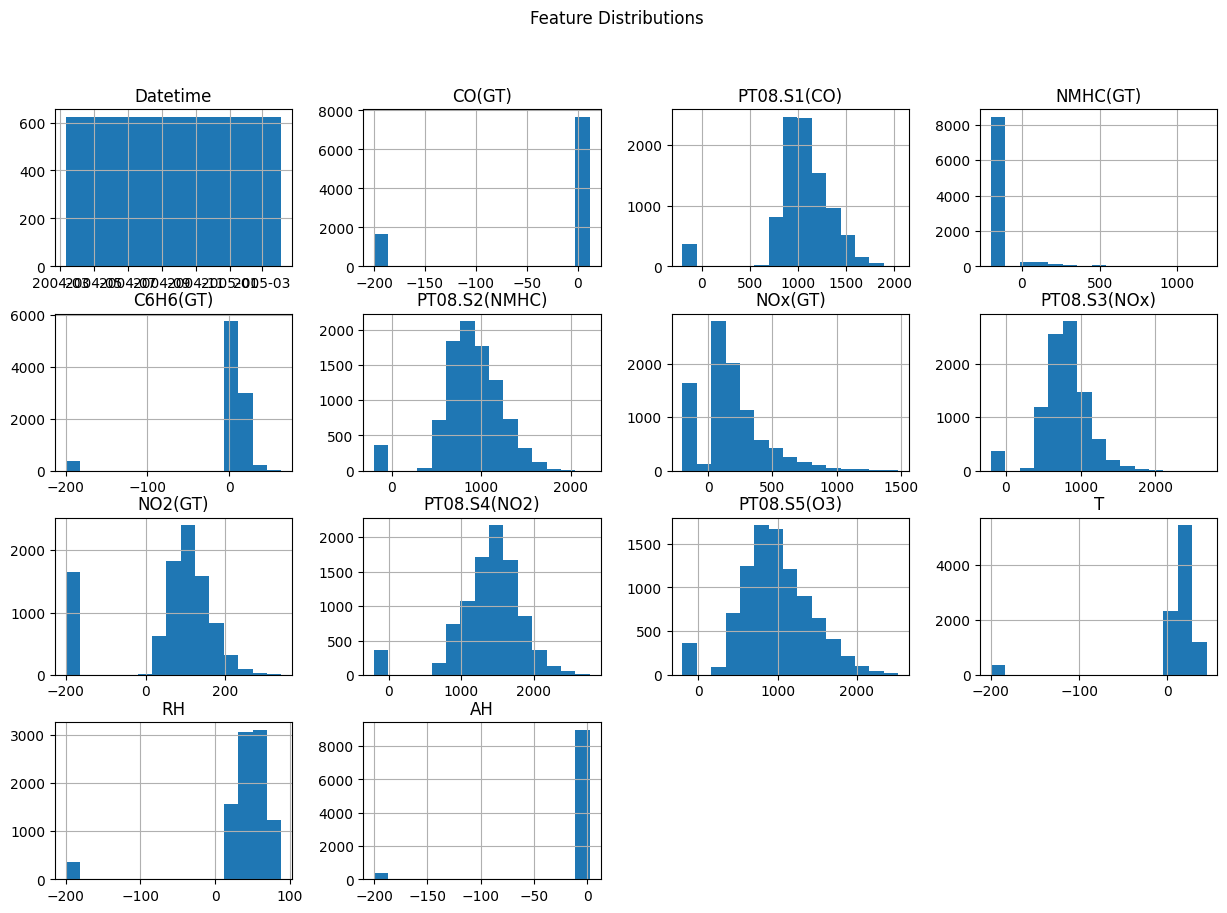

In [177]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

Based on EDA (histograms and summary statistics), we've found that missing values of all features were set to value "-200". We have imputed these missing values with random values sampled from a normal distribution with the mean and variance of non-missing records of that feature.

In [178]:
df_numeric = df.drop(columns = ['Datetime'])

for col in df_numeric.columns:
  mean = df[col].mean()
  sd = df[col].std()

  missing_count = (df[col] == -200).sum()

  vals_to_impute = np.random.normal(loc = mean, scale = sd, size = missing_count)

  df.loc[df[col] == -200, col] = vals_to_impute


<ipython-input-178-f35888d5683d>:11: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[-149.96604994 -379.82351161   -5.20896325 ...  -92.73957441 -150.95616264
  -93.55115196]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[col] == -200, col] = vals_to_impute


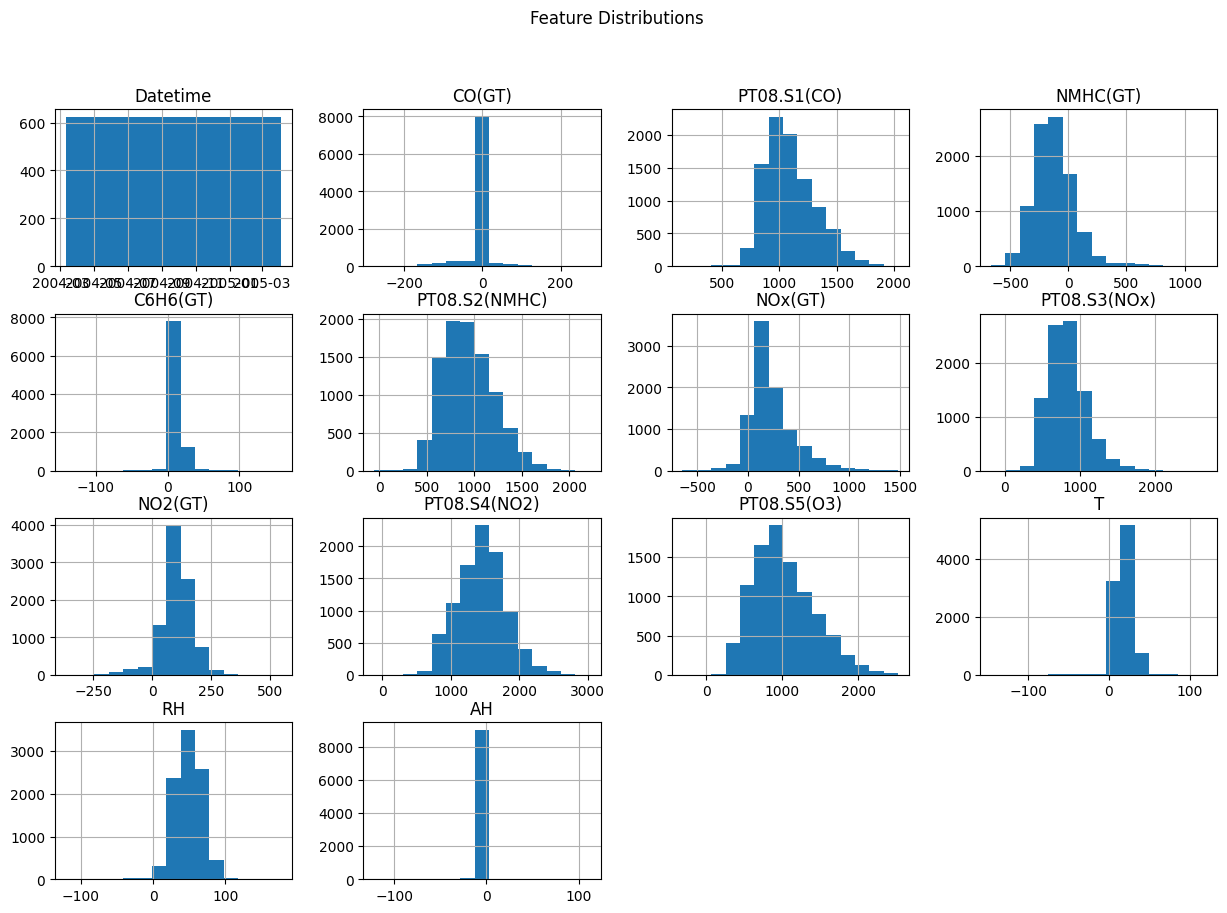

In [80]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Feature Distributions")
plt.show()

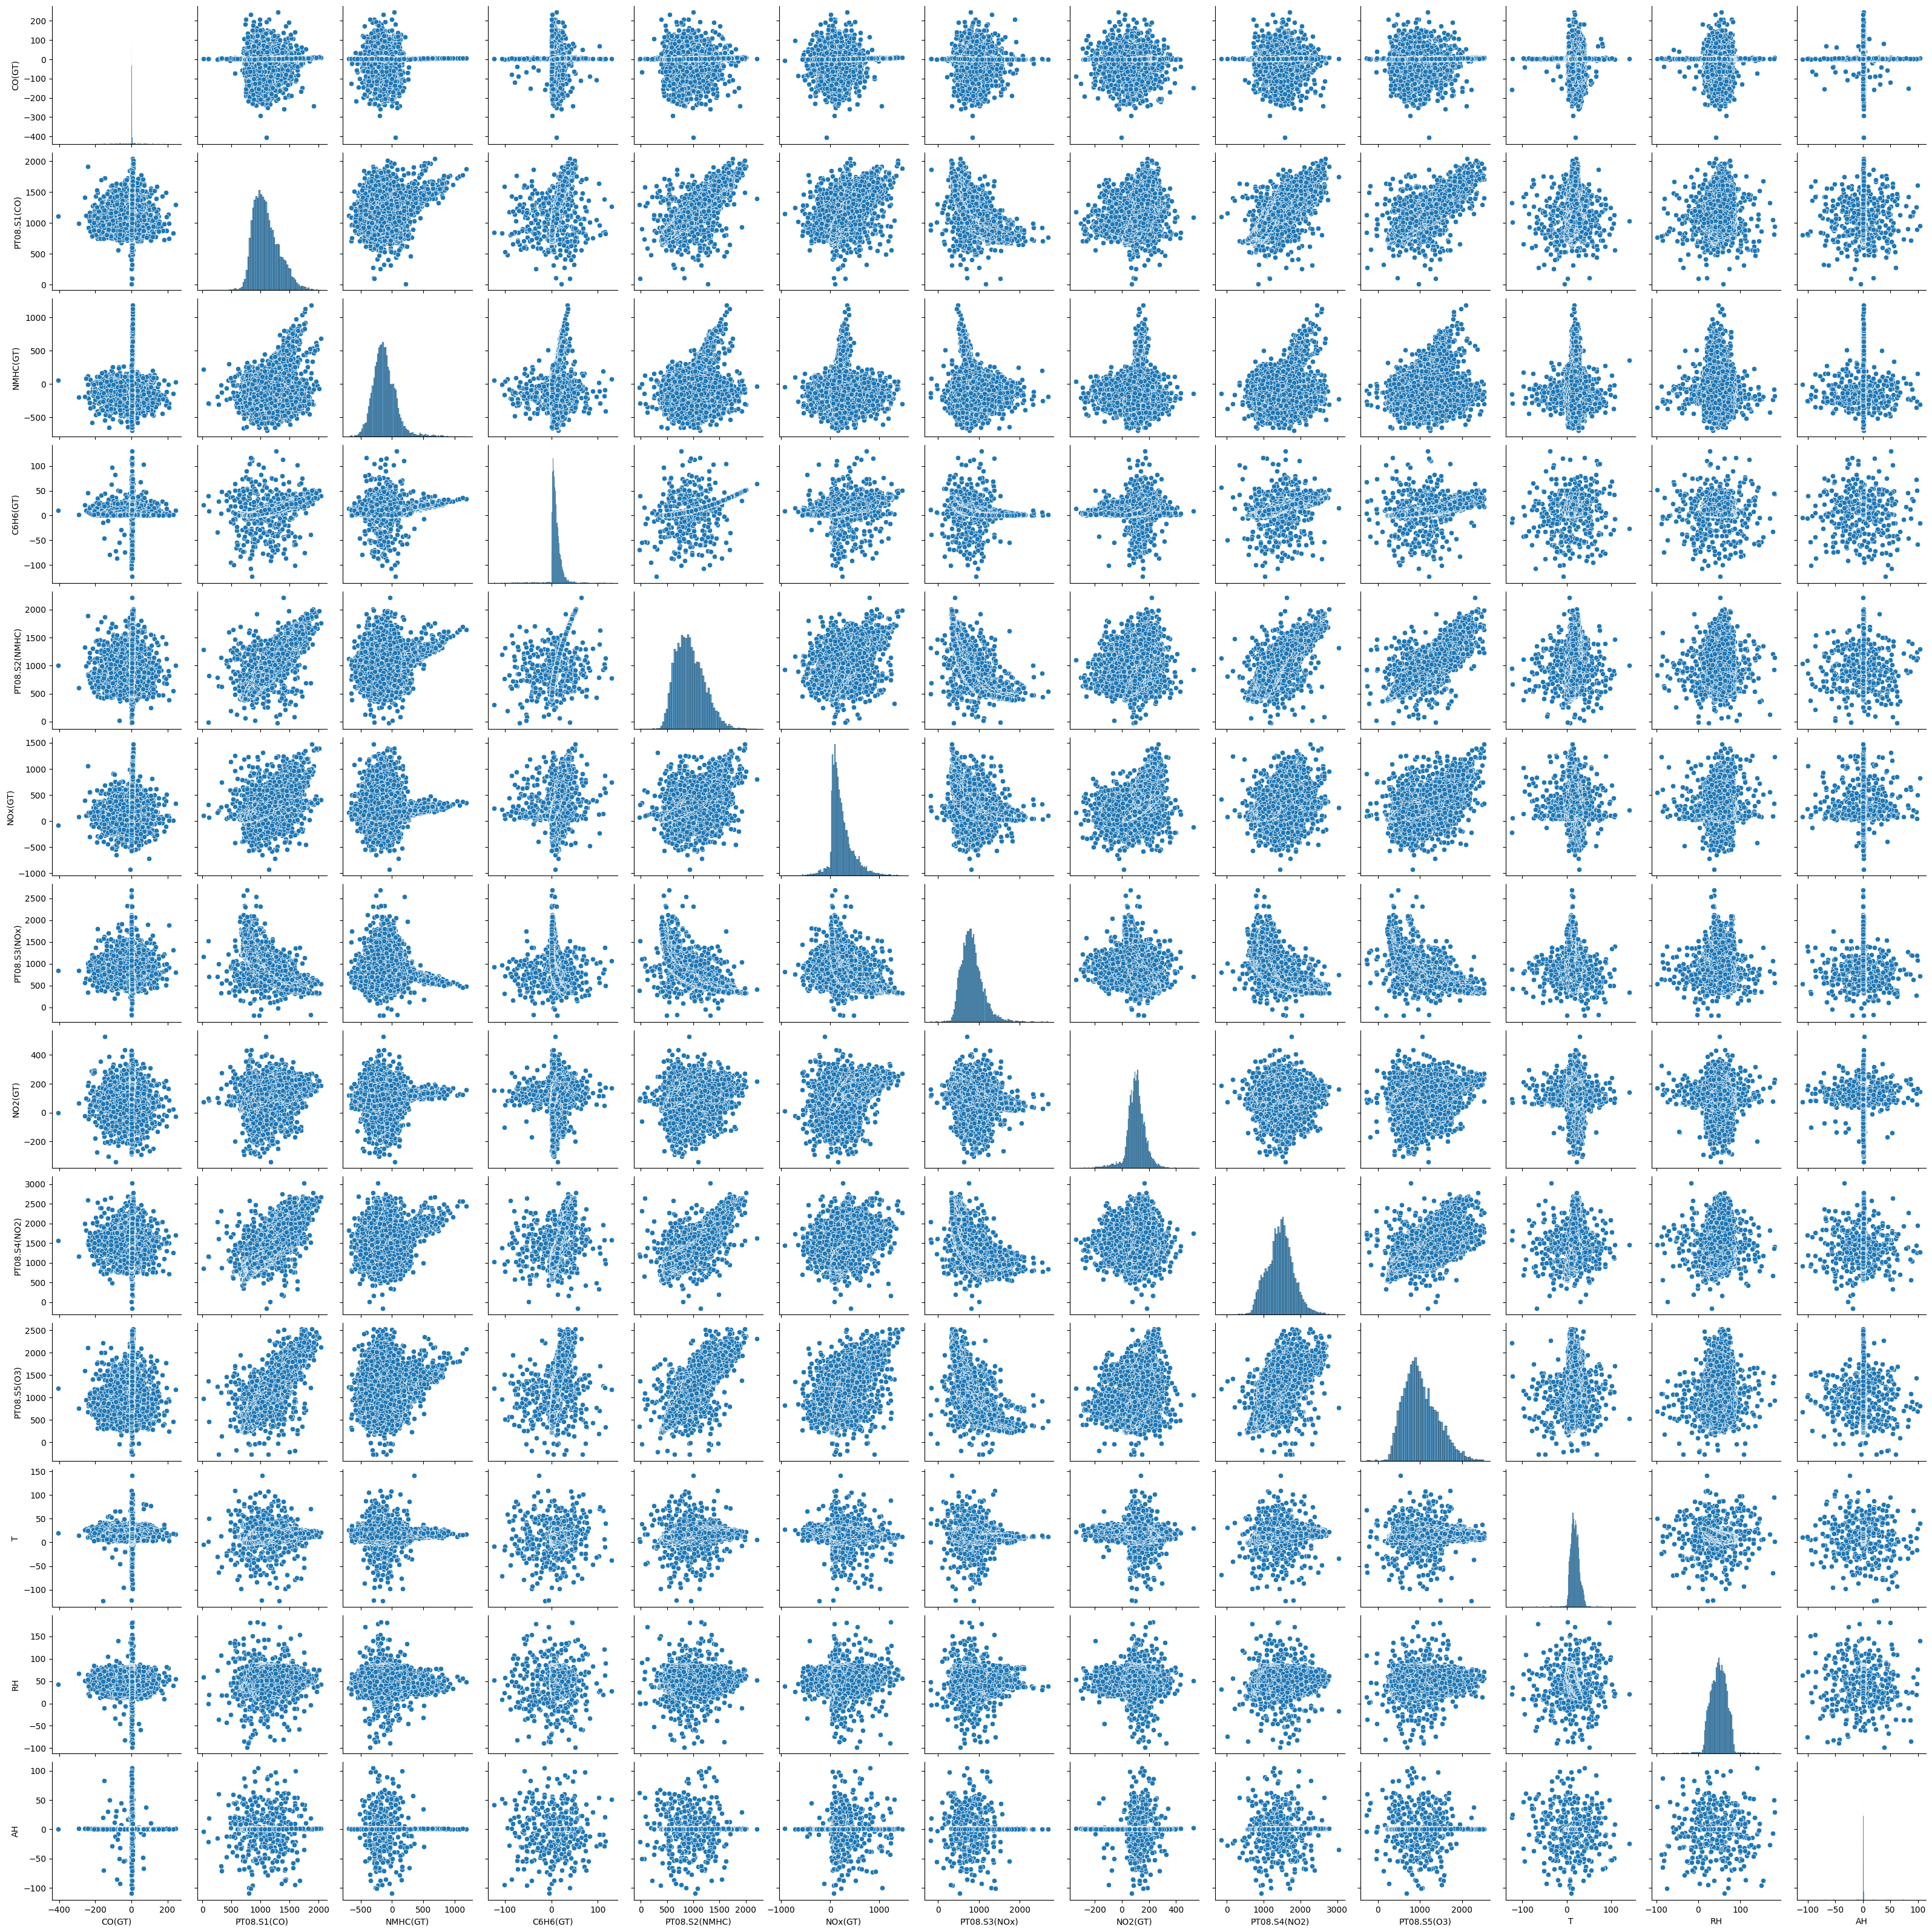

In [71]:
sns.pairplot(df_numeric)
plt.show()

<Axes: >

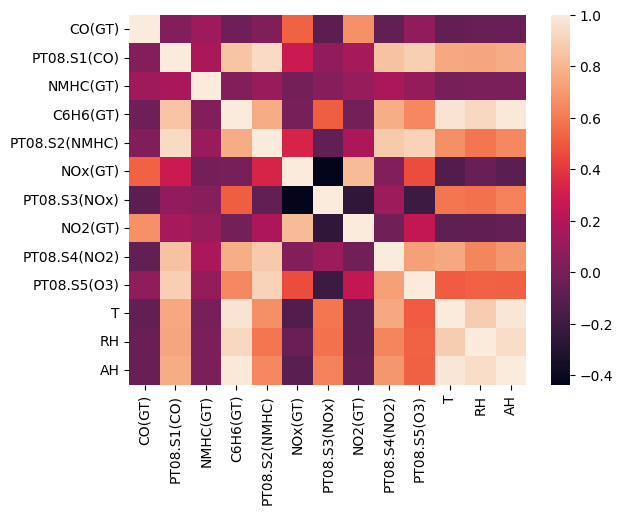

In [89]:
corr_dataframe = df_numeric.corr()
sns.heatmap(corr_dataframe)

Based on the heatmap, we can conclude that the following pairs of features are highly correlated:

*   (T, AH)
*   (RH, AH)
*   (C6H6, T)
*   (C6H6, AH)


As "NOx" index is one of the most important features of air quality, we have chosen NOx as our target variable.

<Axes: xlabel='AH'>

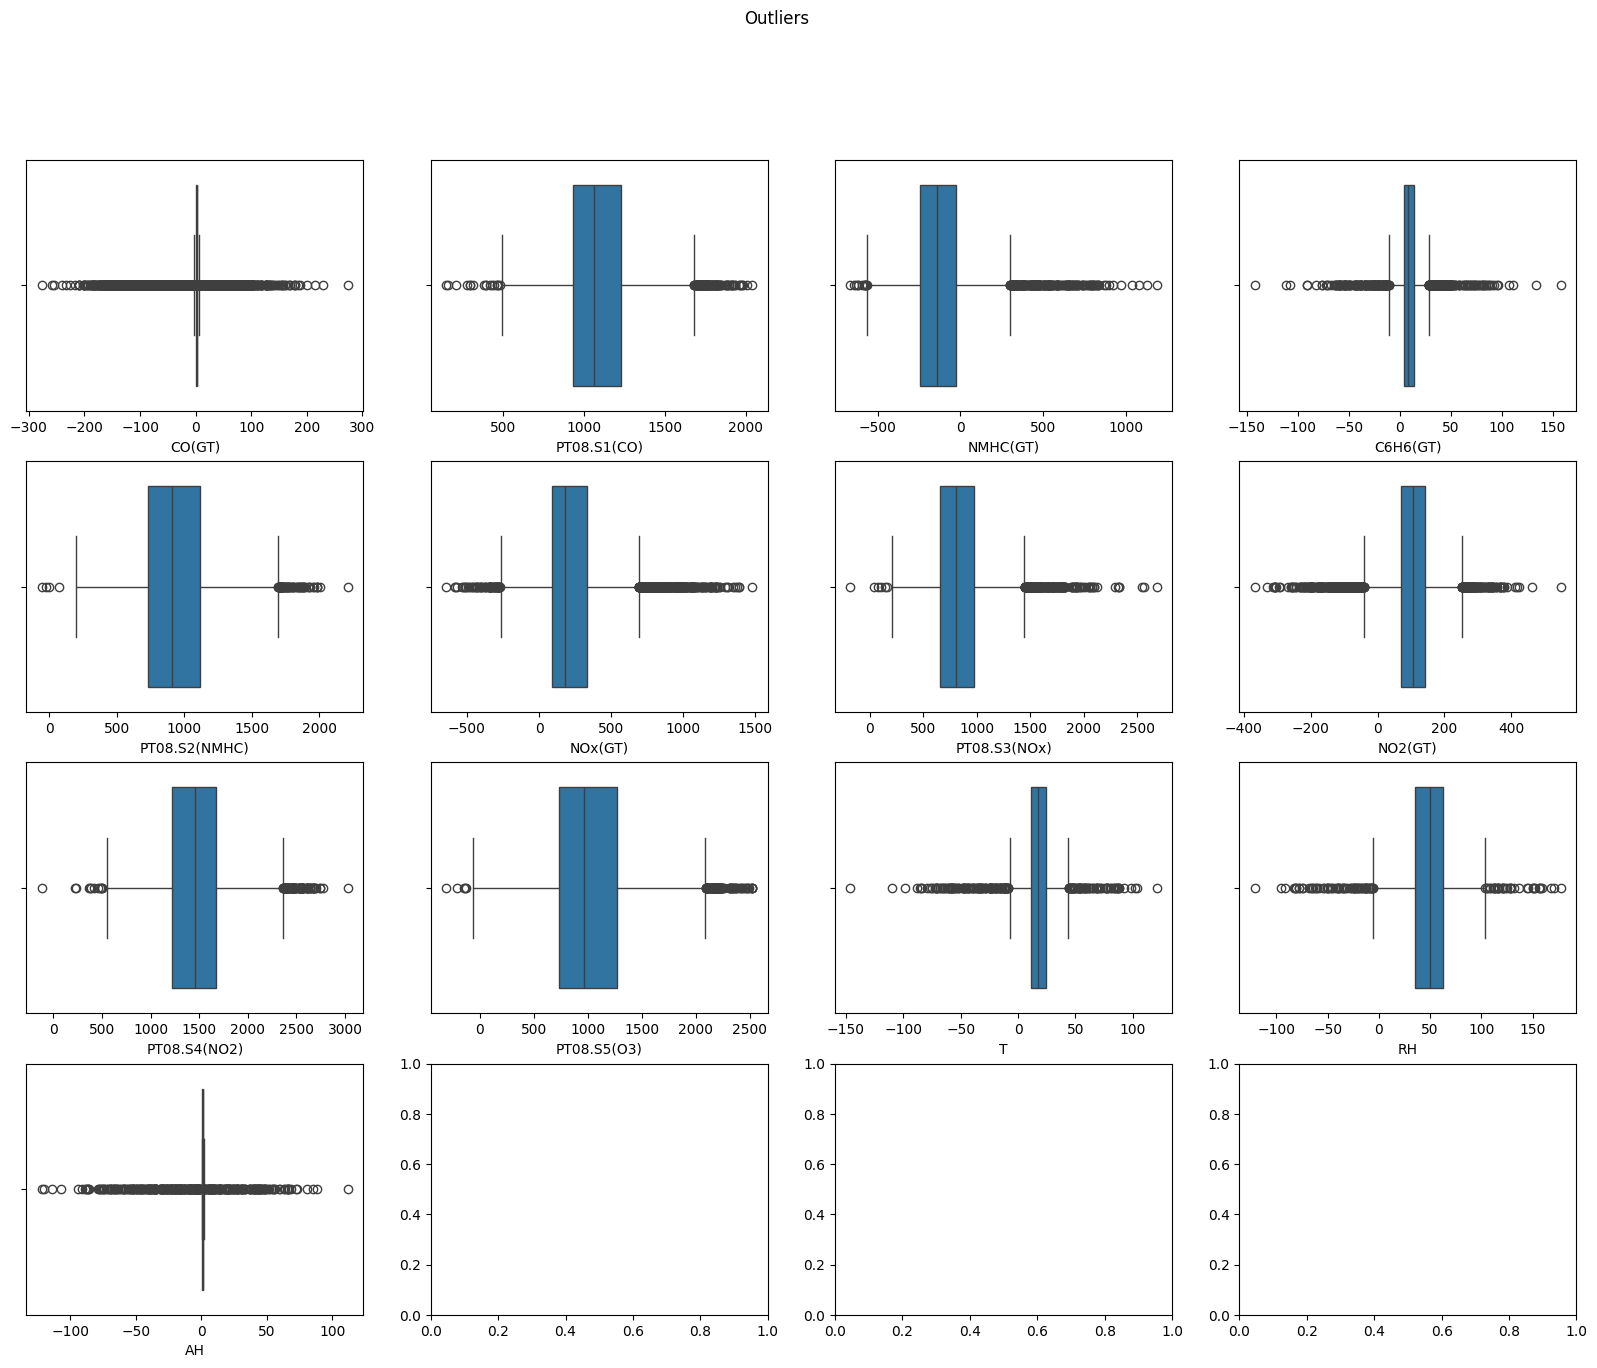

In [114]:
fig, axes = plt.subplots(4, 4, figsize=(20, 15))

fig.suptitle('Outliers')

sns.boxplot(ax=axes[0, 0], data=df, x='CO(GT)')
sns.boxplot(ax=axes[0, 1], data=df, x='PT08.S1(CO)')
sns.boxplot(ax=axes[0, 2], data=df, x='NMHC(GT)')
sns.boxplot(ax=axes[0, 3], data=df, x='C6H6(GT)')
sns.boxplot(ax=axes[1, 0], data=df, x='PT08.S2(NMHC)')
sns.boxplot(ax=axes[1, 1], data=df, x='NOx(GT)')
sns.boxplot(ax=axes[1, 2], data=df, x='PT08.S3(NOx)')
sns.boxplot(ax=axes[1, 3], data=df, x='NO2(GT)')
sns.boxplot(ax=axes[2, 0], data=df, x='PT08.S4(NO2)')
sns.boxplot(ax=axes[2, 1], data=df, x='PT08.S5(O3)')
sns.boxplot(ax=axes[2, 2], data=df, x='T')
sns.boxplot(ax=axes[2, 3], data=df, x='RH')
sns.boxplot(ax=axes[3, 0], data=df, x='AH')


The spread (variance) of all of our features is relatively low; specially the features "AH" and "CO".

In [179]:
df = df.sort_values('Datetime')

As "NOx" index is one of the most important features of air quality, we have chosen NOx as our target variable.

Text(0.5, 1.0, 'Time Series Plot')

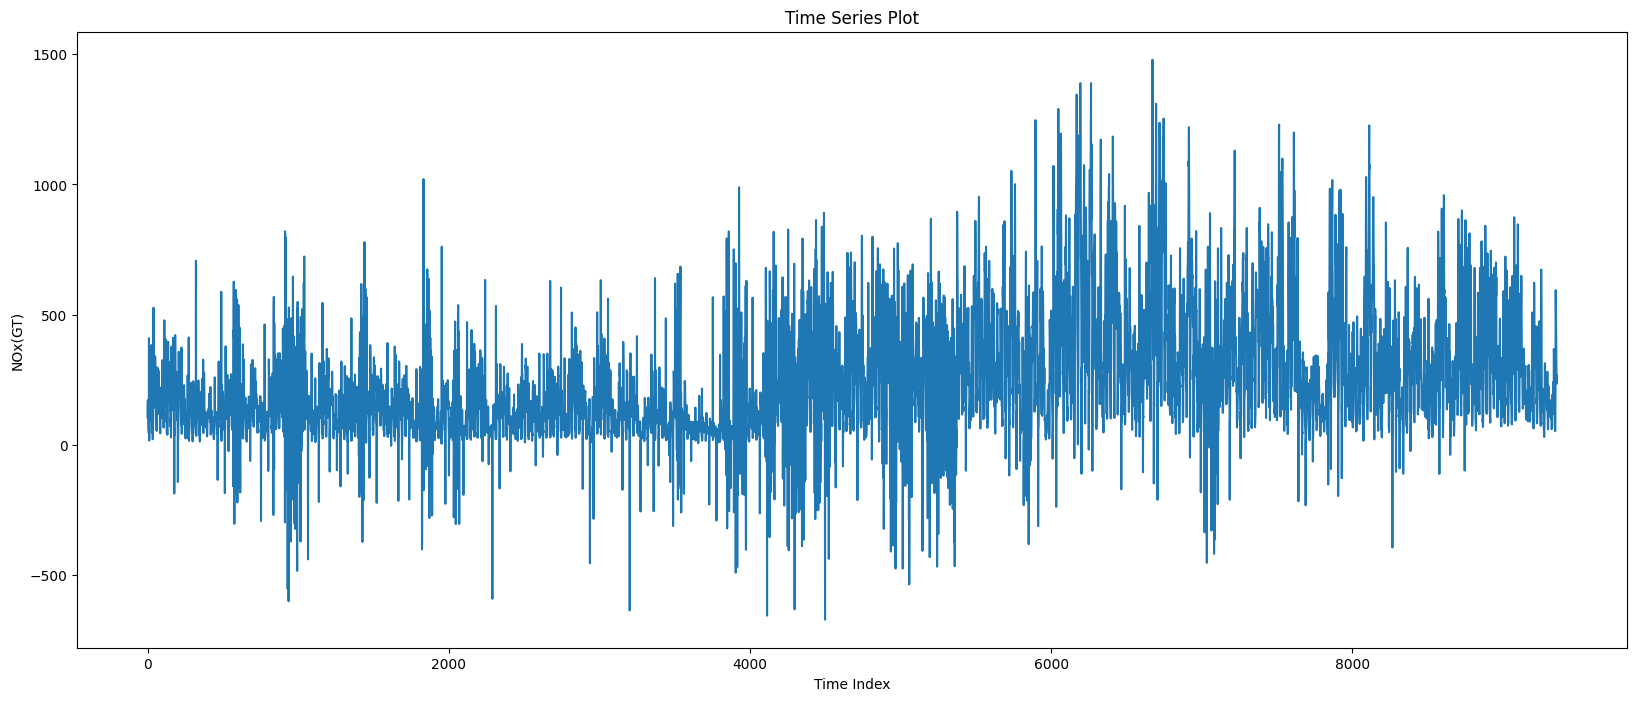

In [183]:
plt.figure(figsize = (20, 8))
plt.plot(range(len(df)), df['NOx(GT)'])
plt.xlabel("Time Index")
plt.ylabel("NOx(GT)")
plt.title("Time Series Plot")

# RNN(LSTM)

As our records are collected hourly, in order to prepare our dataset for feeding it to learning algorithm, we have made pairs of $(x_i, y_i)$ where each $x_i$ is an array of 24 hours of records and the corresponding $y_i$ is the record at the end of that 24 hour.

In [107]:
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

SEQ_LENGTH = 24  # Using 24 hours of data to predict the next value
data = df['NOx(GT)'].values
X, y = create_sequences(data, SEQ_LENGTH)

As the min-max scaling method is the preferred method for RNNs, we have performed min-max scaling on the dataset.

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = MinMaxScaler()

X_train_flat = X_train.reshape(-1, 1)
X_test_flat = X_test.reshape(-1, 1)

scaler.fit(X_train_flat)

X_train_scaled = scaler.transform(X_train_flat).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = scaler.transform(X_test_flat).reshape((X_test.shape[0], X_test.shape[1], 1))

y_train_scaled = scaler.transform(y_train.reshape(-1, 1)).ravel()
y_test_scaled = scaler.transform(y_test.reshape(-1, 1)).ravel()

In [144]:
y_train_scaled = y_train_scaled.reshape(-1)
y_test_scaled = y_test_scaled.reshape(-1)

We chose a stacked LSTM consisting of two layers. In the first layer, the hidden state (and also the cell state) is a vector of dimension 50. </br>
In the second layer, the hidden state (and also the cell state) is a vector of dimension 30. </br>
The dropout parameter turns off a fraction (in our case, 20%) of neurons in order to prevent overfitting. As our task is regression, the final layer would be a single neuron with no activation function.

In [190]:
model = Sequential([
    LSTM(50, activation='tanh', recurrent_activation = 'sigmoid',
        return_sequences=True, input_shape=(SEQ_LENGTH, 1)),
    Dropout(0.1),
    LSTM(30, activation='tanh'),
    Dropout(0.1),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_20 (LSTM)                       │ (None, 24, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 24, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 30)                  │           9,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 30)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 20,151 (78.71 KB)

 Trainable params: 20,151 (78.71 KB)

 Non-trainable params: 0 (0.00 B)

For the training of the model, we have performed batch gradient descent with mini-batches of size 32. The number of epochs refers to the number of times we sweep through the whole dataset.

In [191]:
history = model.fit(X_train_scaled, y_train_scaled, epochs=50, batch_size=32, validation_data=(X_test_scaled, y_test_scaled), verbose=1)

Epoch 1/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 13s 40ms/step - loss: 0.0330 - val_loss: 0.0074
Epoch 2/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0083 - val_loss: 0.0070
Epoch 3/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - loss: 0.0082 - val_loss: 0.0063
Epoch 4/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - loss: 0.0077 - val_loss: 0.0056
Epoch 5/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 23ms/step - loss: 0.0069 - val_loss: 0.0052
Epoch 6/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - loss: 0.0066 - val_loss: 0.0050
Epoch 7/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - loss: 0.0062 - val_loss: 0.0053
Epoch 8/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 0.0063 - val_loss: 0.0052
Epoch 9/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 11s 31ms/step - loss: 0.0061 - val_loss: 0.0053
Epoch 10/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0062 - val_loss: 0.0047
Epoch 11/50
234/234 ━━━━━━━━━━━━━━━━━━━━ 6s 27ms/step - loss: 0.0060 - val_loss: 0.0046
Epoch 12/50
234/234 ━━━━━━━━━━━━━━━━

59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 99254.8828
Test Loss: 102718.484375


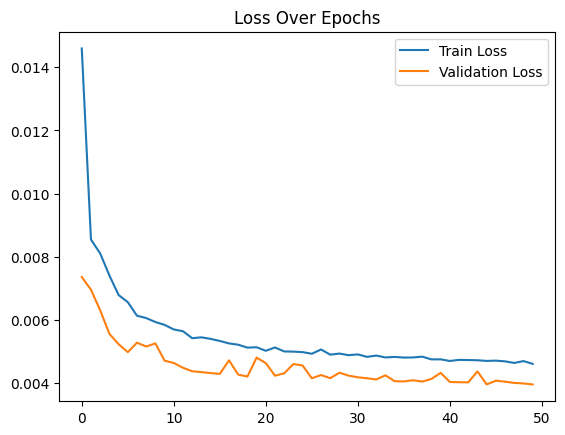

In [192]:
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss Over Epochs')
plt.show()